In [2782]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
import os

In [2783]:
root = "env/"

In [2989]:
envs = os.listdir(root)
envs = envs[0:len(envs)-1]
envs = [int(x) for x in envs]
envs.sort()

print "Please select a testing environment from the following environments list:"

for i in envs:
    print "Environment: (",i,")"
    
test_env = raw_input("Testing environment ")

test_env = int(test_env)

Please select a testing environment from the following environments list:
Environment: ( 5 )
Environment: ( 6 )
Environment: ( 8 )
Environment: ( 9 )
Environment: ( 10 )
Testing environment 10


In [2990]:
envs.remove(test_env)
train_env=envs

In [2991]:
train_env

[5, 6, 8, 9]

In [2992]:
train_root = root + str(test_env) + "/dat/" + "train_dat/"
test_root = root + str(test_env) + "/dat/" + "test_dat/" 

In [2993]:
training_data = pd.read_csv("env/" + str(test_env) + "/dat/train_dat/" + "features", header=None)

In [2994]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.000000,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.054377,0.0,0.0,0.003979,0.20557,0.19496,0.183024,0.193634,0.057029,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.000000,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.003058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.000000,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [2995]:
ticks=np.arange(0,19,1)

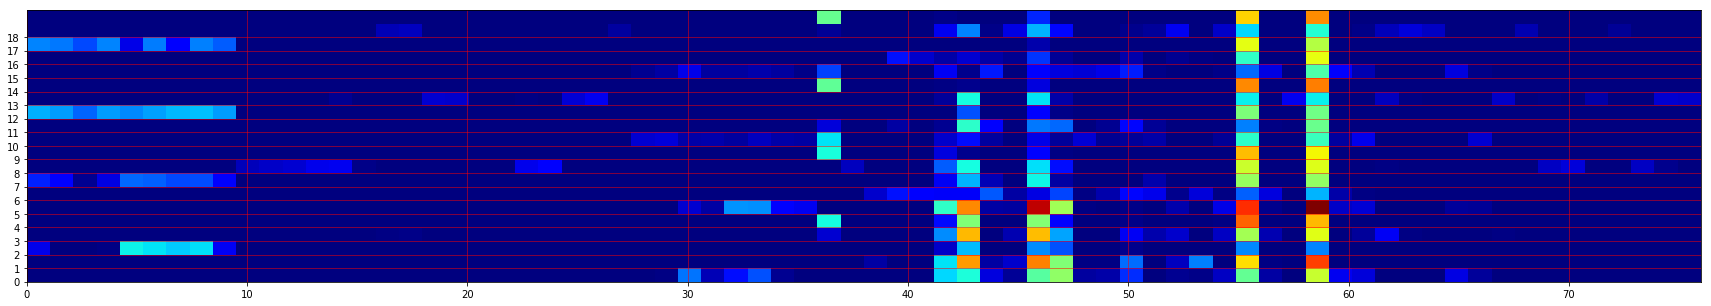

In [2996]:
plt.figure(figsize=(30,5))
plt.yticks(ticks)
plt.grid(color='red', linestyle='-', linewidth=0.5)
plt.imshow(training_data.iloc[:,0:-1],cmap='jet', interpolation='nearest', origin='lower', extent=[0,76,0,20], aspect='auto')
plt.show()

# Calculating the importance of each dimension

In [2997]:
place_cluster = training_data.iloc[:,-1].values.reshape(-1).tolist()
places = set(place_cluster)

In [2998]:
place = []
for p in places:
    loc = []
    for c in place_cluster:
        if p == c:
            loc.append(1)
        else:
            loc.append(0)
    place.append(loc)

In [2999]:
#place = training_data.iloc[:,-1].values
#places = set(training_data.iloc[:,-1])

In [3000]:
place

[[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]]

In [3001]:
feature_map = training_data.iloc[:,0:-1]

In [3002]:
places

{0.0, 1.0, 2.0, 3.0, 4.0}

In [3003]:
feature_map = feature_map.apply(lambda x: [y if y == 0 else 1 for y in x])

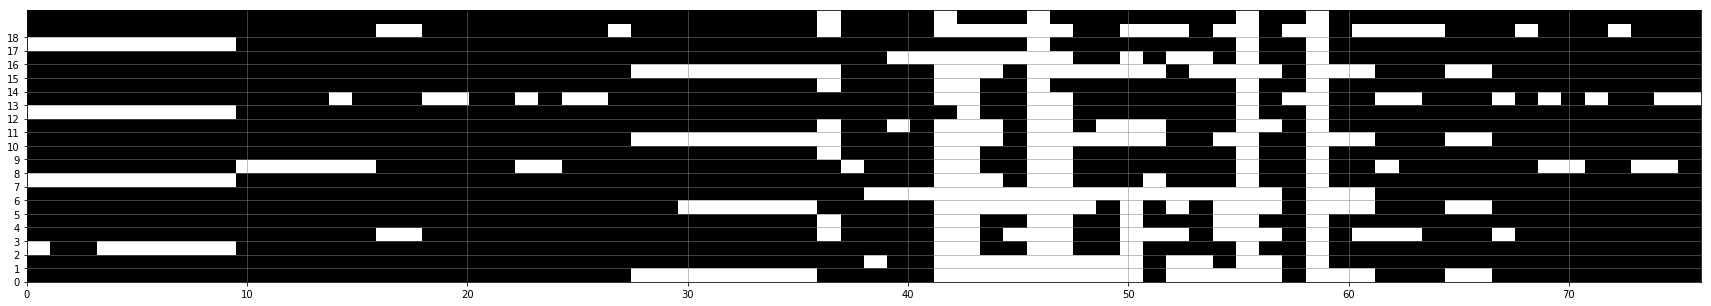

In [3004]:
plt.figure(figsize=(30,5))
plt.yticks(ticks)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.imshow(feature_map,cmap='gray', interpolation='nearest', origin='lower', extent=[0,76,0,20], aspect='auto')
plt.show()

In [3005]:
feature_map.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3006]:
#Remove dimensions with low standard deviation
#feature_map = feature_map.loc[:, feature_map.sum() == 4]
#feature_map = feature_map.loc[:, feature_map.sum() < 6]

In [3007]:
prob = []
num = 0
for items in np.array(feature_map.T):
    p = []
    denom_array = []
    #print items
    for m in range(0,len(places)):
        #print np.sum(place[m])
        denom_array.append(np.multiply(place[m],items)/np.sum(place[m]))
        #print denom_array
        denom = np.sum(denom_array)
        
    for n in range(0,len(places)):
        if np.sum(np.multiply(items,np.asarray(place))) == 0.0:
            p.append(1.0/len(places))
            #print np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])])
        else:
            p.append((np.sum(np.multiply(place[n],items))/np.sum(place[n])) / denom)#np.sum([np.multiply(items,place[0])/np.sum(place[0]) , np.multiply(items,place[1])/np.sum(place[1]) , np.multiply(items,place[2])/np.sum(place[2])]))#/np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])])
    prob.append(p)

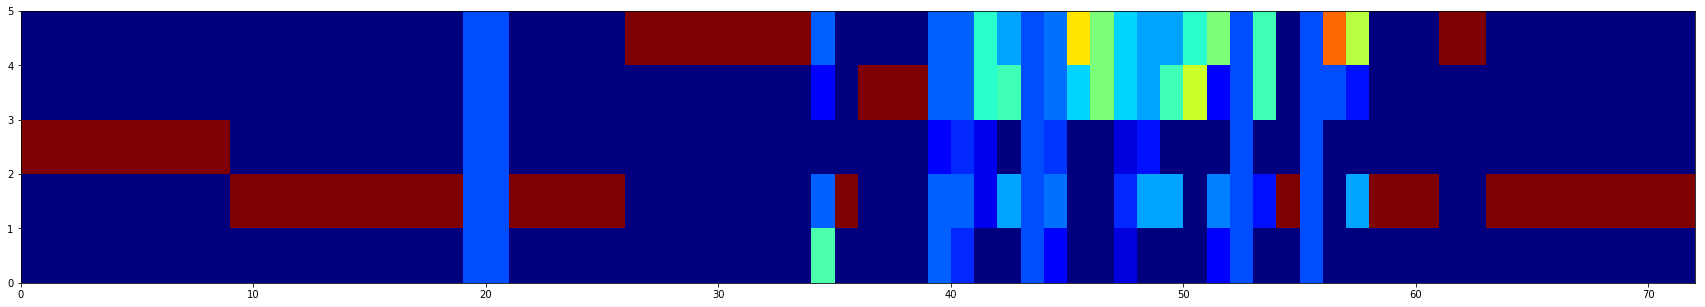

In [3008]:
plt.figure(figsize=(30,5))
plt.imshow(np.array(prob).T,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(prob),0,len(place)], aspect='auto')

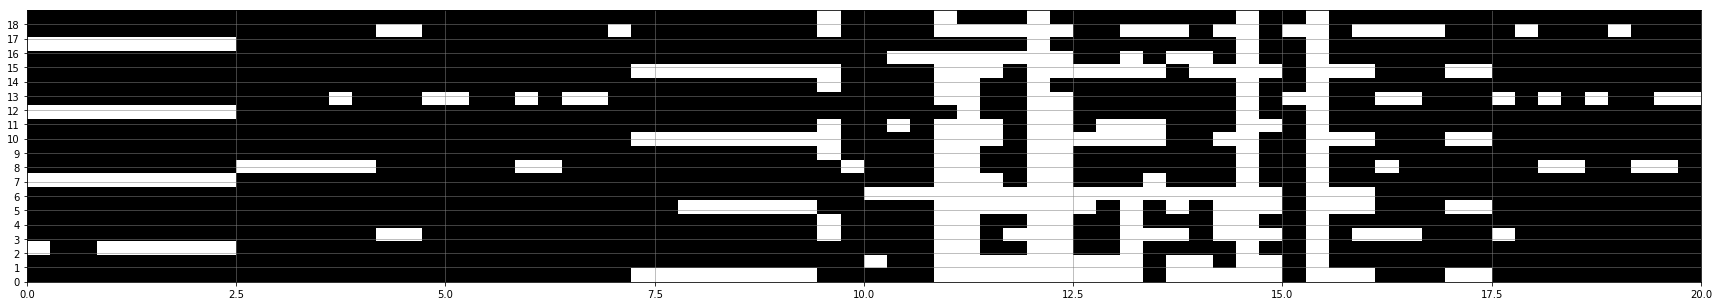

In [3009]:
plt.figure(figsize=(30,5))
plt.yticks(ticks)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.imshow(feature_map,cmap='gray', interpolation='nearest', origin='lower', extent=[0,len(feature_map[0]),0,19], aspect='auto')
plt.show()

# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = training_data.iloc[:,:-1]
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
#model.fit(training_data.iloc[:, :-1].values, training_data.iloc[:, -1].values.astype(int) )
model.fit(feature_map, training_data.iloc[:, -1].values.astype(int) )
# display the relative importance of each attribute
print(model.feature_importances_)

In [3010]:
prob_sum = []
for probs in prob:
    prob_sum.append(np.sum(np.power(probs,2)))
    #prob_sum.append(np.sum(probs*np.log2(probs)))

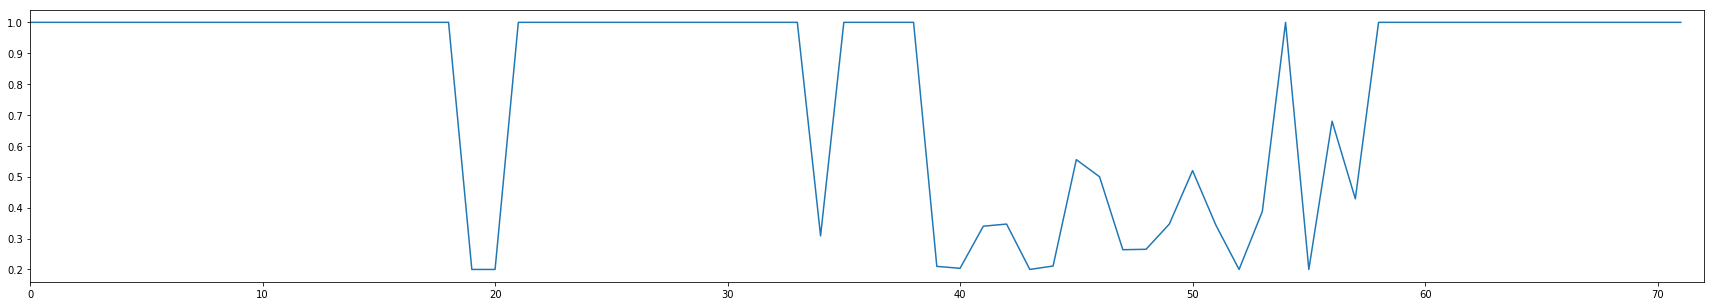

In [3011]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(prob_sum))
plt.plot(prob_sum)

[0:8,25:30,35:36,59:60,62:66]

In [3012]:
count = 0
imp = []
for p in prob:
    #print max(p)
    if max(p) == 1:
        imp.append(count)
    count = count + 1

In [3013]:
np.array(imp)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36,
       37, 38, 54, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71])

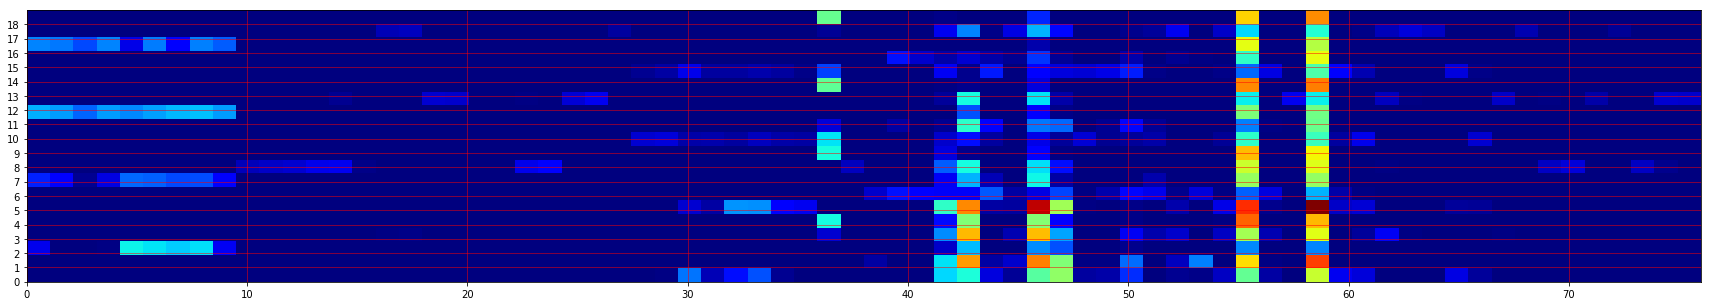

In [3014]:
plt.figure(figsize=(30,5))
plt.yticks(ticks)
plt.grid(color='red', linestyle='-', linewidth=0.5)
plt.imshow(training_data.iloc[:,0:-1],cmap='jet', interpolation='nearest', origin='lower', extent=[0,76,0,19], aspect='auto')
plt.show()

In [3015]:
testing_data = pd.read_csv("env/" + str(test_env) + "/dat/test_dat/" + "features", header=None)

In [3016]:
testing_data

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.10551,0.107855,0.103165,0.103165,0.025791,0.103165,0.071512,0.101993,0.098476,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [3017]:
X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values.astype(int)  

In [3018]:
X_test = testing_data.iloc[:, :-1].values
y_test = testing_data.iloc[:, -1].values.astype(int)   

In [3019]:
feature_map2 = testing_data.iloc[:, :-1]
feature_map2 = feature_map2.apply(lambda x: [y if y == 0 else 1 for y in x])

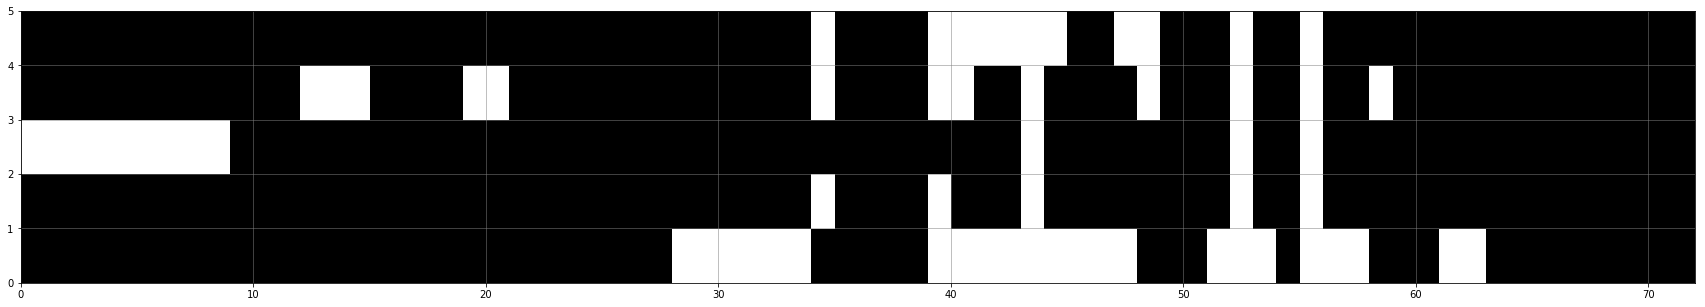

In [3020]:
plt.figure(figsize=(30,5))
plt.yticks(ticks)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.imshow(feature_map2,cmap='gray', interpolation='nearest', origin='lower', extent=[0,len(feature_map2.values[0]),0,5], aspect='auto')
plt.show()

In [3021]:
len(X_test[0])

72

In [3022]:
np.array(imp)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36,
       37, 38, 54, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71])

# Feature selection

In [3023]:
from sklearn.feature_selection import SelectKBest, f_regression

def select_k_best(data, k):
    X = data.iloc[:, :-1].values
    Y = data.iloc[:, -1].values.astype(int)

    selector = SelectKBest(score_func=f_regression, k=k) 
    selector.fit(X, Y)
    mask = selector.get_support()  
    #print(boston.feature_names)
    print(mask)

    X_selected = selector.transform(X)
    print("X.shape={}, X_selected.shape={}".format(X.shape, X_selected.shape))
    return mask

In [3024]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def do_rfe(data):
    X = data.iloc[:, :-1].values
    Y = data.iloc[:, -1].values.astype(int)
    # feature extraction
    model = LogisticRegression()
    #model = KNeighborsClassifier(n_neighbors=5,p=2)
    rfe = RFE(model, 3)
    fit = rfe.fit(X, Y)
    print("Num Features: %d") % fit.n_features_
    print("Selected Features: %s") % fit.support_
    print("Feature Ranking: %s") % fit.ranking_
    
    return fit.ranking_

# Updating training and test data from the selected features

In [3025]:
def update_data(X_train, X_test):
    #mask = select_k_best(training_data, 20)
    #mask = do_rfe(training_data)
    
    #### test_mask ####
    test_mask = np.full(len(X_train[0]), False,dtype=bool)
    #for m in np.r_[0:8,25:30,34:35,59:60,62:66]:
    #    test_mask[m] = True

    for m in imp:#[:-1]:#np.r_[0:8,25:30,34:35,59:60,62:66]:
        test_mask[m] = True
    
    mask = test_mask
    
    #print np.where(mask==True)
    train_fts = []
    test_fts = []
    for tr in X_train:
        train_fts.append(tr[mask])

    for te in X_test:
        test_fts.append(te[mask])

    X_train = pd.DataFrame(train_fts).values
    X_test = pd.DataFrame(test_fts).values
    
    return X_train, X_test

In [3026]:
X_train, X_test = update_data(X_train, X_test)

In [3027]:
len(X_train[0])

51

test_mask = np.full(76, False,dtype=bool)

test_mask

for m in imp[:-1]:#np.r_[0:8,25:30,35:36,59:60,62:66]:
    test_mask[m] = True


np.r_[0:8,25:30,35:36,59:60,62:66]

mask = select_k_best(training_data)
train_fts = []
test_fts = []
for tr in X_train:
    train_fts.append(tr[mask])
    
for te in X_test:
    test_fts.append(te[mask])
    
X_train = pd.DataFrame(train_fts).values
X_test = pd.DataFrame(test_fts).values

pd.DataFrame(test_fts)

test_fts = []
train_fts = []
for tr in X_train:
    train_fts.append(np.take(tr,ft_to_save)[0])
    
for te in X_test:
    test_fts.append(np.take(te,ft_to_save)[0])
    
X_train = pd.DataFrame(train_fts).values
X_test = pd.DataFrame(test_fts).values

ft_to_save = np.where(fit.ranking_<4)

test_fts = []
train_fts = []
for tr in X_train:
    train_fts.append(np.take(tr,ft_to_save)[0])
    
for te in X_test:
    test_fts.append(np.take(te,ft_to_save)[0])
    
X_train = pd.DataFrame(train_fts).values
X_test = pd.DataFrame(test_fts).values

# KNN search

In [3028]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=17,p=2,weights = 'distance')  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='distance')

In [3029]:
y_pred = classifier.predict(X_test)  

In [3030]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))


[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1

   micro avg       0.60      0.60      0.60         5
   macro avg       0.47      0.60      0.50         5
weighted avg       0.47      0.60      0.50         5



In [3031]:
f = open(test_root+'knn_results', 'w')
f.write(classification_report(y_test, y_pred))
f.close()

In [3032]:
test_root

'env/10/dat/test_dat/'

,0,1,2,3,4
0,1,0,0,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,0,1


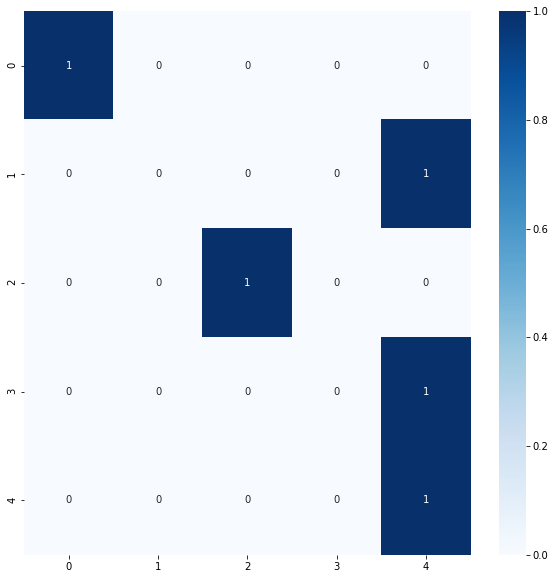

In [3033]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(CM, index = [i for i in set(y_test)],
                  columns = [i for i in set(y_test)])

display(df_cm)

# Visualize it as a heatmap
import seaborn
plt.figure(figsize=(10, 10))
seaborn.heatmap(df_cm,cmap='Blues',annot=True,fmt='g')
#plt.savefig(test_root+"confusion_mat.png")
plt.show()

In [3034]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i,p=2,weights = 'distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

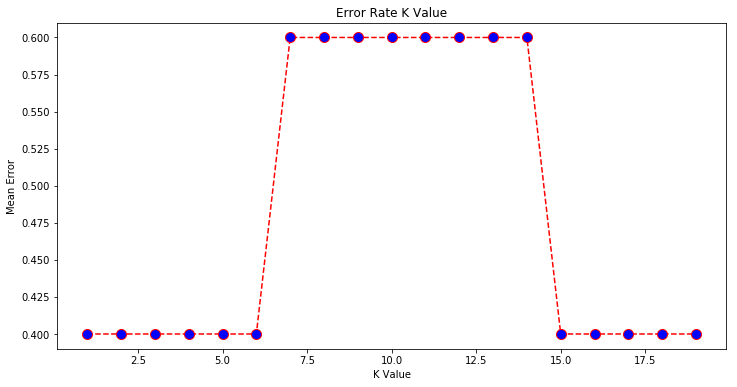

In [3035]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.savefig(test_root+"error_rate_k_value).png")
plt.show()

# Decision Tree

In [3036]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [3037]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1

   micro avg       0.60      0.60      0.60         5
   macro avg       0.47      0.60      0.50         5
weighted avg       0.47      0.60      0.50         5



In [3038]:
f = open(test_root+'decision_tree_results', 'w')
f.write(classification_report(y_test, y_pred))
f.close()

,0,1,2,3,4
0,1,0,0,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,0,1


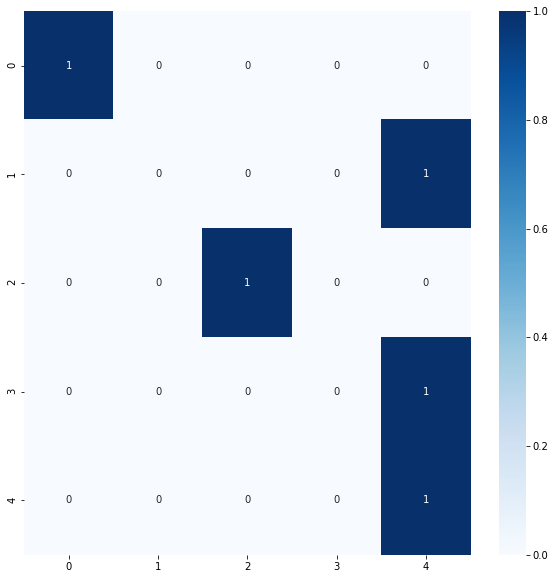

In [3039]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(CM, index = [i for i in set(y_test)],
                  columns = [i for i in set(y_test)])

display(df_cm)

# Visualize it as a heatmap
import seaborn
plt.figure(figsize=(10, 10))
seaborn.heatmap(df_cm,cmap='Blues',annot=True,fmt='g')
#plt.savefig(test_root+"confusion_mat.png")
plt.show()

import seaborn as sns
#sns.pairplot(training_data.iloc[:, np.r_[0:8,25:30,35:36,59:60,62:66]])
sns.pairplot(pd.DataFrame(X_train))

In [2835]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))